## Exploring dataset
This notebook is intended for exploring the dataset (images and metadata).

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
import sys
sys.path.append("../")

## Generate image statistics

1. Read the images from the folder
2. Store the results in a CSV file
3. Read images statistics from the generated CSV file
4. Get dataset statistics
5. Plot histogram for the data in dataset
6. Check the unique sources from metadata file


Processing images for: COVID
Processing images for: NORMAL
Processing images for: Viral_Pneumonia
Processing images for: Lung_Opacity


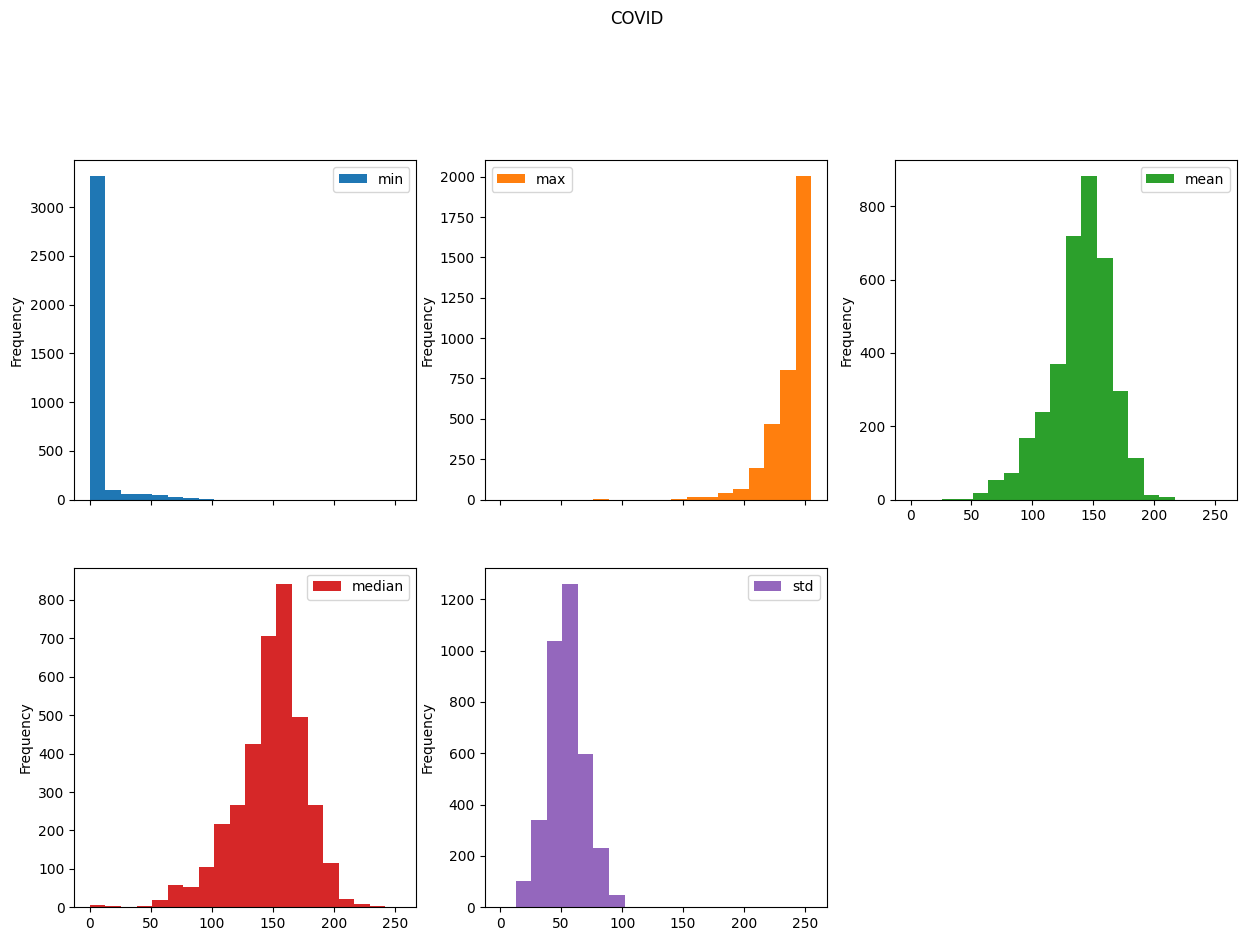

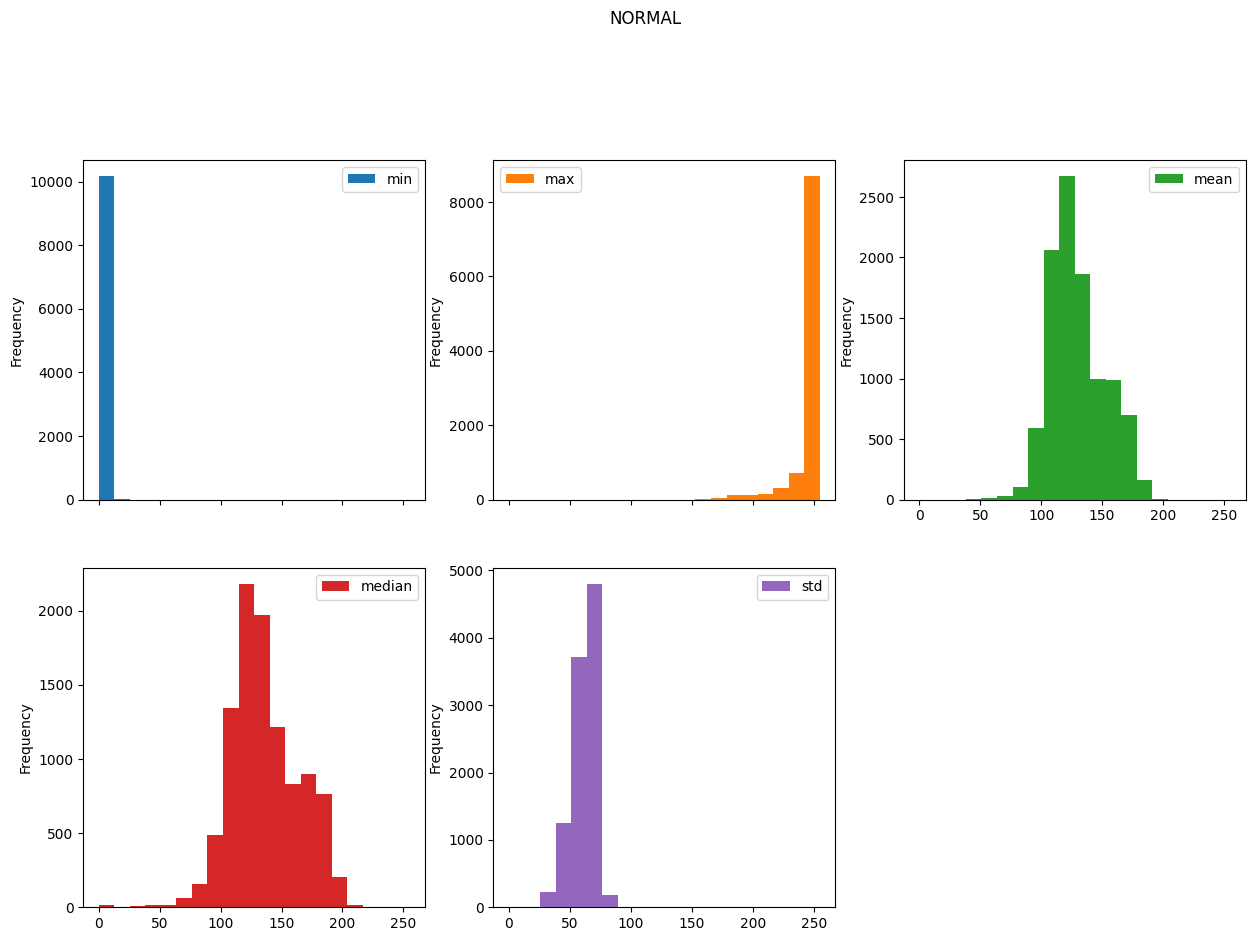

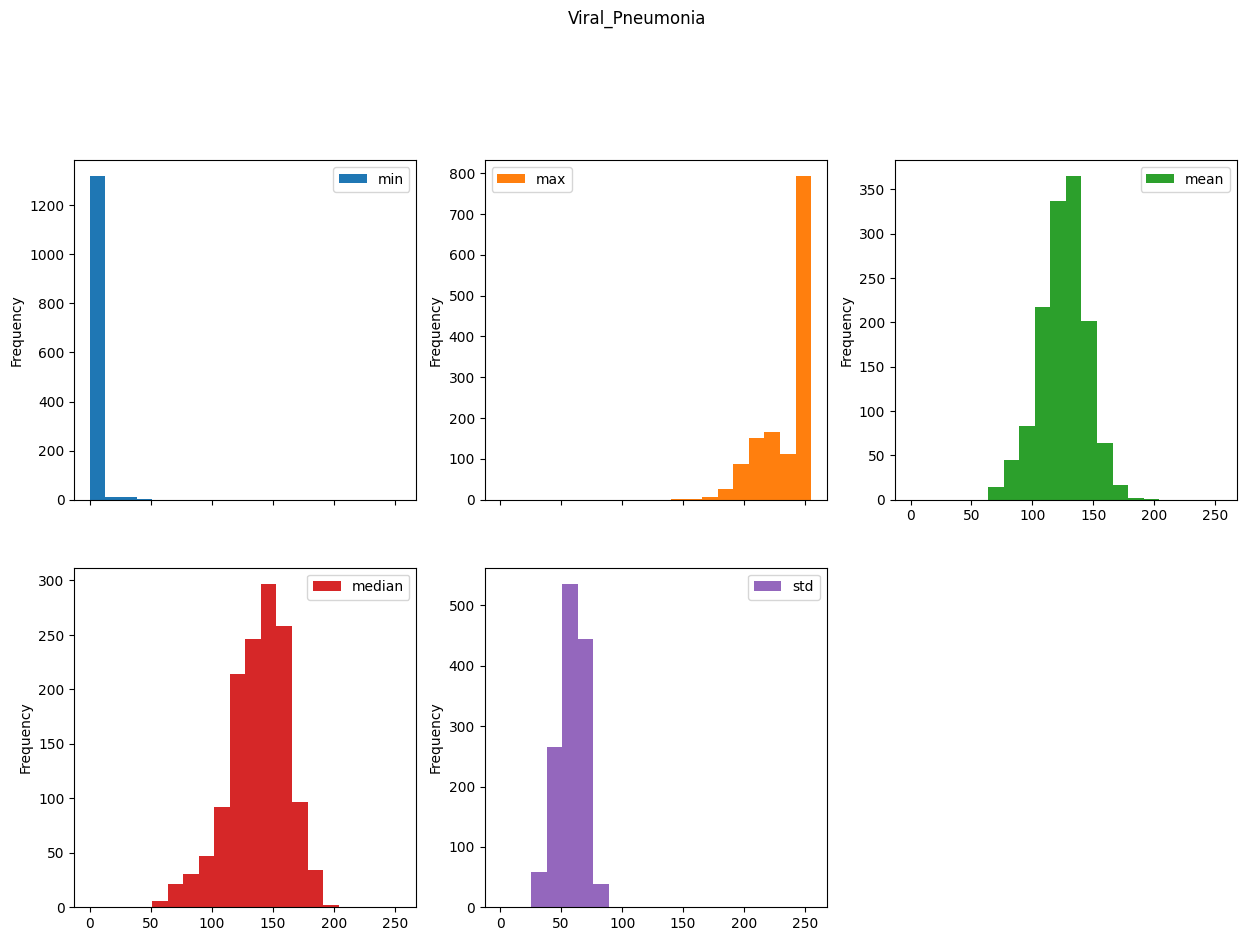

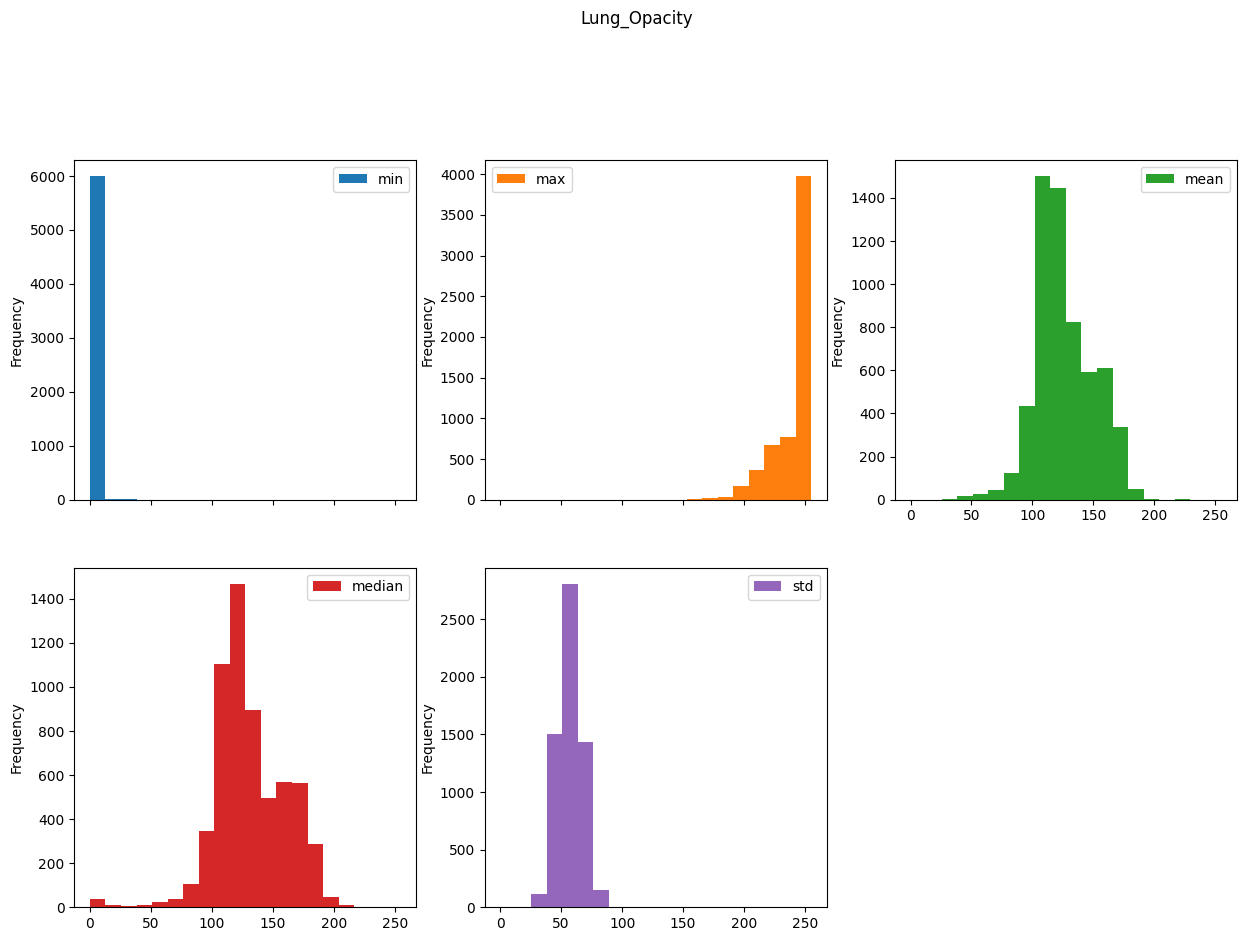

In [2]:
from src.preprocessing.image_preprocessor import get_images_statistics,store_images_statistics
import pandas as pd

dataset = ['COVID','NORMAL','Viral_Pneumonia','Lung_Opacity']

for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_statistics('../../COVID-19_Radiography_Dataset/'+i+'/images')
    filename =  '../data/preprocessed/'+i.lower()+'_images_statistics.csv'
    store_images_statistics(image_stats,filename)
    stats = pd.read_csv('../data/preprocessed/'+i.lower()+'_images_statistics.csv', index_col=0)
    stats.plot.hist(subplots=True, layout=(3,3), figsize=(15, 15), bins=20, title=i)



## Find dataset sources

In [3]:
for i in dataset:
    print('Finding images data sources for:',i)
    stats = pd.read_csv('../data/raw/'+i.lower()+'_metadata.csv', index_col=0)
    display(stats.URL.unique())
    print('Number of sources of '+i.lower()+' iamges:',len(stats.URL.unique()))
    print('=====================================================================================================')

Finding images data sources for: COVID


array(['https://sirm.org/category/senza-categoria/covid-19/',
       'https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png',
       'https://eurorad.org', 'https://github.com/armiro/COVID-CXNet',
       'https://github.com/ieee8023/covid-chestxray-dataset',
       'https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711'],
      dtype=object)

Number of sources of covid iamges: 6
Finding images data sources for: NORMAL


array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data',
       'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

Number of sources of normal iamges: 2
Finding images data sources for: Viral_Pneumonia


array(['https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

Number of sources of viral_pneumonia iamges: 1
Finding images data sources for: Lung_Opacity


array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data'],
      dtype=object)

Number of sources of lung_opacity iamges: 1
